In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
%matplotlib inline


In [3]:
sales_data = pd.read_json('../data/blooth_sales_data.json',
                              convert_dates=['birthday', 'orderdate']
                              )
sales_data['turnover'] = sales_data['unitprice'] * sales_data['units']

sales_data.head(5)

,birthday,customer,name,orderdate,product,unitprice,units,turnover
0,1967-09-02,Electronics Inc,Pasquale,2016-07-17 13:48:03.156566,Thriller record,13.27,2,26.54
1,1968-12-13,Electronics Resource Group,India,2016-07-06 13:48:03.156596,Corolla,24458.69,26,635925.94
2,1992-09-10,East Application Contract Inc,Wayne,2016-07-22 13:48:03.156618,Rubik’s Cube,15.79,41,647.39
3,1986-11-05,Signal Industries,Cori,2016-07-23 13:48:03.156638,iPhone,584.01,16,9344.16
4,1972-04-23,Star Alpha Industries,Chang,2016-07-16 13:48:03.156657,Harry Potter book,25.69,4,102.76


In [4]:
tt = sales_data[['product', 'turnover']].groupby('product').sum()
tt

,turnover
product,
Corolla,53191480.51
Harry Potter book,51673.67
Lipitor,25435.05
PlayStation,718578.51
Rubik’s Cube,44957.49
Star Wars,28329.24
Thriller record,33806.96
banana,25690.00
iPad,2028467.59


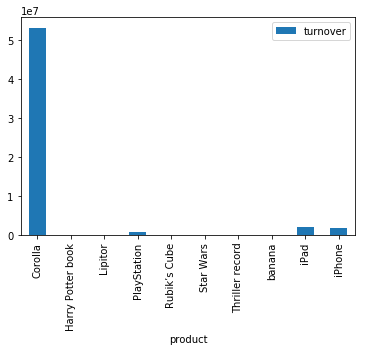

In [5]:
tt.plot.bar()

In [6]:
tu = sales_data[['product', 'units']].groupby('product').sum()

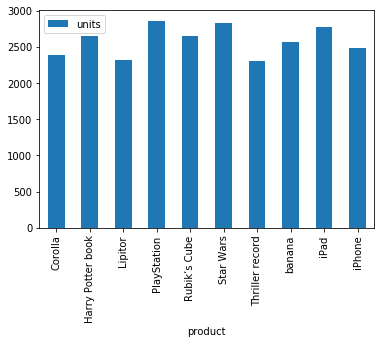

In [7]:
tu.plot.bar()

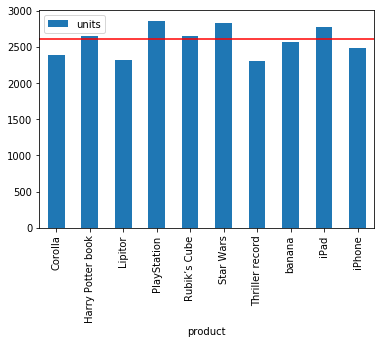

In [8]:
ax = tu.plot.bar()
ax.axhline(tu['units'].median(), color='red', linestyle='-')

In [9]:
td  = sales_data[['orderdate', 'units']].groupby('orderdate').sum()

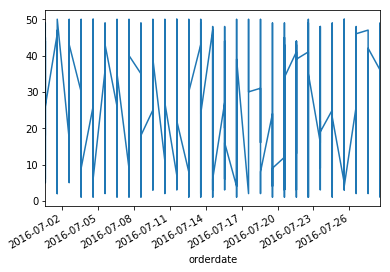

In [10]:
td['units'].plot()

In [11]:
sales_data.index = sales_data['orderdate']
sales_data.head()

,birthday,customer,name,orderdate,product,unitprice,units,turnover
orderdate,,,,,,,,
2016-07-17 13:48:03.156566,1967-09-02,Electronics Inc,Pasquale,2016-07-17 13:48:03.156566,Thriller record,13.27,2,26.54
2016-07-06 13:48:03.156596,1968-12-13,Electronics Resource Group,India,2016-07-06 13:48:03.156596,Corolla,24458.69,26,635925.94
2016-07-22 13:48:03.156618,1992-09-10,East Application Contract Inc,Wayne,2016-07-22 13:48:03.156618,Rubik’s Cube,15.79,41,647.39
2016-07-23 13:48:03.156638,1986-11-05,Signal Industries,Cori,2016-07-23 13:48:03.156638,iPhone,584.01,16,9344.16
2016-07-16 13:48:03.156657,1972-04-23,Star Alpha Industries,Chang,2016-07-16 13:48:03.156657,Harry Potter book,25.69,4,102.76


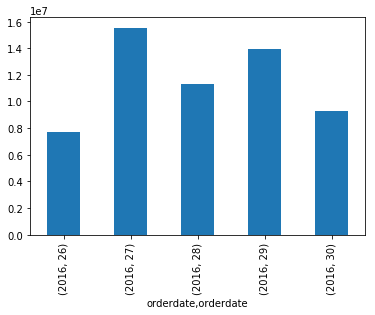

In [12]:
tdi  = sales_data.groupby([sales_data.index.year, sales_data.index.week]).sum()
tdi['turnover'].plot.bar()

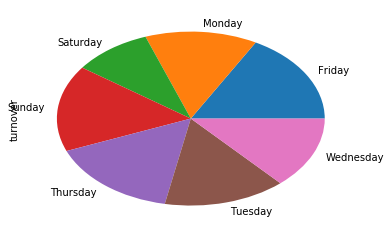

In [13]:
tdi  = sales_data.groupby([sales_data.index.weekday_name]).sum()
tdi['turnover'].plot.pie()